In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel(r'C:\Users\Administrateur\Downloads\titanic3.xls')

In [3]:
data.shape
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [4]:
#pclass	survived	name	sex	age	sibsp	parch	ticket	fare	cabin	embarked	boat	boat	home.dest

data = data.drop(['name', 'sibsp','parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [5]:
data.head(7)

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
5,1,1,male,48.0000
6,1,1,female,63.0000


In [6]:
data = data.dropna(axis = 0)

In [7]:
data.shape

(1046, 4)

In [8]:
data['sex'].replace(['male', 'female'], [0,1], inplace=True)
data.head()

,pclass,survived,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,1,0,1,2.0000
3,1,0,0,30.0000
4,1,0,1,25.0000


EXO : Feature engineering

In [9]:
y = data['survived']
X = data.drop(['survived'], axis=1)

In [10]:
X.shape

(1046, 3)

In [11]:
y.shape

(1046,)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

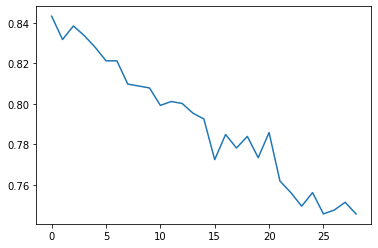

In [13]:
score = []
best_score = 0
best_k = 1

for k in range(best_k,30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X,y)
    score.append(model.score(X,y))
    if best_score<model.score(X,y):
        best_k=k
        best_score=model.score(X,y)
        
print(best_k)
print(best_score)
plt.plot(score)

on a best_k=1 (ie 1 voisin) qui donne le meilleur score 84,32 %. quand k augmente, la performance du modèle diminue

In [14]:
#definir une fonction survie
def survie(model, pclass=2, sex=0, age=62):
    X = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(X))
    print(model.predict_proba(X))

In [15]:
survie(model)

[0]
[[0.65517241 0.34482759]]


ie pour un homme de 62 ans voyageant en classe 2, le modele prédit qu'il ne survit pas au nauffrage avec une probabilité de 65.52 %

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
modelin = LinearRegression()
modelin.fit(X,y)
modelin.score(X,y)

0.36858378037908945

on voit que la regression linéaire ne convient pas : score = 37 %.

In [18]:
X.head()

,pclass,sex,age
0,1,1,29.0000
1,1,0,0.9167
2,1,1,2.0000
3,1,0,30.0000
4,1,1,25.0000
